<a href="https://colab.research.google.com/github/MasaAsami/LTsandox/blob/main/notebooks/%E8%B3%83%E9%87%91%E6%A7%8B%E9%80%A0%E5%9F%BA%E6%9C%AC%E8%AA%BF%E6%9F%BB%E3%82%B5%E3%83%B3%E3%83%97%E3%83%AB%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title パラメータ
_URL = "https://www.e-stat.go.jp/"

after_path_dict = {
    "2020": {
        "正社員・正職員計": "/stat-search/file-download?statInfId=000032069456&fileKind=0",
        "正社員・正職員以外計": "/stat-search/file-download?statInfId=000032069457&fileKind=0",
    },
    "2021": {
        "正社員・正職員計": "/stat-search/file-download?statInfId=000032182977&fileKind=4",
        "正社員・正職員以外計": "/stat-search/file-download?statInfId=000032182978&fileKind=4",
    },
}
before_path_dict = {
    "2009_正社員・正職員計": "/stat-search/file-download?statInfId=000032135133&fileKind=4",
    "2008_正社員・正職員計": "/stat-search/file-download?statInfId=000032135195&fileKind=4",
    "2007_正社員・正職員計": "/stat-search/file-download?statInfId=000032135257&fileKind=4",
    "2006_正社員・正職員計": "/stat-search/file-download?statInfId=000032135319&fileKind=4",
    "2019_正社員・正職員計": "/stat-search/file-download?statInfId=000032117087&fileKind=4",
    "2018_正社員・正職員計": "/stat-search/file-download?statInfId=000032117103&fileKind=4",
    "2017_正社員・正職員計": "/stat-search/file-download?statInfId=000032117119&fileKind=4",
    "2016_正社員・正職員計": "/stat-search/file-download?statInfId=000032117135&fileKind=4",
    "2015_正社員・正職員計": "/stat-search/file-download?statInfId=000032117151&fileKind=4",
    "2014_正社員・正職員計": "/stat-search/file-download?statInfId=000032117167&fileKind=4",
    "2013_正社員・正職員計": "/stat-search/file-download?statInfId=000032117183&fileKind=4",
    "2012_正社員・正職員計": "/stat-search/file-download?statInfId=000032117199&fileKind=4",
    "2011_正社員・正職員計": "/stat-search/file-download?statInfId=000032117215&fileKind=4",
    "2010_正社員・正職員計": "/stat-search/file-download?statInfId=000032117231&fileKind=4",
    "2009_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032135134&fileKind=4",
    "2008_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032135196&fileKind=4",
    "2007_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032135258&fileKind=4",
    "2006_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032135320&fileKind=4",
    "2019_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032117088&fileKind=4",
    "2018_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032117104&fileKind=4",
    "2017_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032117120&fileKind=4",
    "2016_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032117136&fileKind=4",
    "2015_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032117152&fileKind=4",
    "2014_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032117168&fileKind=4",
    "2013_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032117184&fileKind=4",
    "2012_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032117200&fileKind=4",
    "2011_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032117216&fileKind=4",
    "2010_正社員・正職員以外計": "/stat-search/file-download?statInfId=000032117232&fileKind=4",
}

In [2]:
!pip install -q japanize-matplotlib

In [3]:
import datetime
import time
from IPython.display import display, Markdown

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

japanize_matplotlib.japanize()
plt.style.use("ggplot")

In [4]:
# @title 2020年以降の所定内給与額
after2020_df = []

for _yyyy in after_path_dict.keys():
    for _job_type in after_path_dict[_yyyy].keys():
        print(f"{_yyyy}年 {_job_type} 取得中 :", _URL + after_path_dict[_yyyy][_job_type])
        input_file = pd.ExcelFile(_URL + after_path_dict[_yyyy][_job_type])
        industry_names = input_file.sheet_names
        for _industry in industry_names:
            _df = input_file.parse(
                _industry,
                skiprows=11,
                usecols="C, I, Q, Y, AG",  # "C:AI"
                names=[
                    "temp_category",
                    "企業規模計（10人以上）",
                    "1,000人以上",
                    "100～999人",
                    "10～99人",
                ],
            )
            assert (
                _df.tail(1)["temp_category"].values[0] == "７０歳～"
            ), "assertion error : 最後の行が不正です。確認してください"

            _df = _df.assign(
                gender=_df["temp_category"]
                .apply(
                    lambda x: str(x).split("\n")[0] if str(x).find("\n") > 0 else np.nan
                )
                .fillna(method="ffill"),
                education=_df["temp_category"]
                .apply(
                    lambda x: str(x).split("\n")[1] if str(x).find("\n") > 0 else (str(x) if str(x).find("歳") < 0 else np.nan)
                )
                .fillna(method="ffill"),
                age=np.where(
                    _df["temp_category"].str.contains("歳"), _df["temp_category"], "年齢計"
                ),
            ).drop(columns="temp_category")

            _df = pd.melt(
                _df,
                id_vars=["age", "education", "gender"],
                value_name="value",
                var_name="corporate_scale",
                col_level=None,
            )

            _df = _df.assign(
                year=_yyyy,
                industry=_industry,
                unit="所定内給与額",
                job_type=_job_type,
                original_url=_URL + after_path_dict[_yyyy][_job_type],
            )

            after2020_df.append(_df)


after2020_df = pd.concat(after2020_df).reset_index(drop=True)

2020年 正社員・正職員計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032069456&fileKind=0
2020年 正社員・正職員以外計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032069457&fileKind=0
2021年 正社員・正職員計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032182977&fileKind=4
2021年 正社員・正職員以外計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032182978&fileKind=4


In [5]:
# @title 2019年以前の所定内給与額
before2020_df = []

for yyyy_job_type in before_path_dict.keys():
    _yyyy, _job_type = yyyy_job_type.split("_")

    print(f"{_yyyy}年 {_job_type} 取得中 :", _URL + before_path_dict[yyyy_job_type])
    input_file = pd.ExcelFile(_URL + before_path_dict[yyyy_job_type])
    industry_names = input_file.sheet_names
    for _industry in industry_names:
        _df = input_file.parse(
            _industry,
            skiprows=11,
            usecols="C, I, Q, Y, AG",  # "C:AI"
            names=[
                "temp_category",
                "企業規模計（10人以上）",
                "1,000人以上",
                "100～999人",
                "10～99人",
            ],
        )
        assert (
            _df.tail(1)["temp_category"].values[0] == "７０歳～"
        ), "assertion error : 最後の行が不正です。確認してください"

        _df = _df.assign(
                gender = _df["temp_category"].apply(lambda x: str(x).replace("　", "").strip().split("\n")[0] if str(x).find("\n")> 0 else np.nan).fillna(method='ffill'),
                education = _df["temp_category"].apply(lambda x: "学歴計" if str(x).find("\n")> 0 else (str(x).replace("　", "").strip() if str(x).find("歳") < 0 else np.nan)).fillna(method='ffill'),
                age = np.where(_df["temp_category"].str.contains("歳"), _df["temp_category"], '年齢計'),
            ).drop(columns='temp_category')

        _df = pd.melt(
                _df, 
                id_vars=["age", "education", "gender"], 
                value_name='value', 
                var_name="corporate_scale",
           )

        _df = _df.assign(
            year=_yyyy,
            industry=_industry,
            unit="所定内給与額",
            job_type=_job_type,
            original_url=_URL + before_path_dict[yyyy_job_type],
        )

        before2020_df.append(_df)


before2020_df = pd.concat(before2020_df).reset_index(drop=True)

2009年 正社員・正職員計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032135133&fileKind=4
2008年 正社員・正職員計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032135195&fileKind=4
2007年 正社員・正職員計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032135257&fileKind=4
2006年 正社員・正職員計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032135319&fileKind=4
2019年 正社員・正職員計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032117087&fileKind=4
2018年 正社員・正職員計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032117103&fileKind=4
2017年 正社員・正職員計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032117119&fileKind=4
2016年 正社員・正職員計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032117135&fileKind=4
2015年 正社員・正職員計 取得中 : https://www.e-stat.go.jp//stat-search/file-download?statInfId=000032117151&fileKind=4
2014年 正社員・正職員計 取得中 : https://www.e-st

In [6]:
#@title 少し整形
age_map = {
    "\u3000\u3000～１９歳": "age_00_19_group",
    "２０～２４歳": "age_20_24_group",
    "２５～２９歳": "age_25_29_group",
    "３０～３４歳": "age_30_34_group",
    "３５～３９歳": "age_35_39_group",
    "４０～４４歳": "age_40_44_group",
    "４５～４９歳": "age_45_49_group",
    "５０～５４歳": "age_50_54_group",
    "５５～５９歳": "age_55_59_group",
    "６０～６４歳": "age_60_64_group",
    "６５～６９歳": "age_65_69_group",
    "７０歳～": "age_70over_group",
}


after2020_df = after2020_df.assign(
    industry_code=after2020_df['industry'].apply(lambda x : x[:1] if str(x).find( "産業計") < 0 else x),
    age=after2020_df["age"].replace(
        age_map
    ),
    value=after2020_df["value"].replace("-",np.nan)
)
   

before2020_df = before2020_df.assign(
    industry_code=before2020_df['industry'].apply(lambda x : x[:1] if str(x).find( "産業計") < 0 else x),
    education=before2020_df["education"].replace(
        {
            "中   学   卒": "中学",
            "高   校   卒": "高校",
            "高専・短大卒": "高専・短大",
            "大学・大学院卒": "大学・大学院",
        }
    ),
    gender=before2020_df["gender"].replace(
        {
            "男 女 計": "男女計",
        }
    ),
    age=before2020_df["age"].replace(
        age_map
    ),
    value=before2020_df["value"].replace("-",np.nan)
)

merged_df = pd.concat([before2020_df, after2020_df]).reset_index(drop=True)
merged_df["year"] = merged_df["year"].astype(int)
merged_df.sample(5)

,age,education,gender,corporate_scale,value,year,industry,unit,job_type,original_url,industry_code
267334,age_20_24_group,大学・大学院,女,100～999人,231.0,2017,Ｐ医療，福祉,所定内給与額,正社員・正職員以外計,https://www.e-stat.go.jp//stat-search/file-dow...,Ｐ
235601,age_20_24_group,高専・短大,男女計,企業規模計（10人以上）,175.2,2019,Ｊ金融業，保険業,所定内給与額,正社員・正職員以外計,https://www.e-stat.go.jp//stat-search/file-dow...,Ｊ
396333,age_20_24_group,不明,男女計,100～999人,236.8,2020,Ｌ学術研究，専門・技術サービス業,所定内給与額,正社員・正職員以外計,https://www.e-stat.go.jp//stat-search/file-dow...,Ｌ
65982,age_45_49_group,学歴計,男,100～999人,493.8,2018,Ｇ情報通信業,所定内給与額,正社員・正職員計,https://www.e-stat.go.jp//stat-search/file-dow...,Ｇ
247048,age_55_59_group,高専・短大,女,100～999人,287.6,2018,Ｇ情報通信業,所定内給与額,正社員・正職員以外計,https://www.e-stat.go.jp//stat-search/file-dow...,Ｇ


In [7]:
#@title yearを基準インデックスとしてpivotしておく { display-mode: "form" }
assert (
    merged_df.pivot_table(
        index=["year"],
        columns=[
            "job_type",
            "age",
            "education",
            "gender",
            "corporate_scale",
            "industry_code",
        ],
        values="value",
        aggfunc="count",
    )
    .max()
    .max()
    == 1.0
), "assertion error : セルに重複があります"

pivot_df = merged_df.pivot_table(
    index=["year"],
    columns=[
        "job_type",
        "age",
        "education",
        "gender",
        "corporate_scale",
        "industry_code",
    ],
    values="value",
)

## サンプル分析 : その１
- 2006年から全て観察できるセグメントに対して
- 基準年度からの変化幅、変化率の BEST 5, WORST 5を表示する

In [8]:
 #@markdown ### 基準年度と変化率の最大値、最小値を選択 { display-mode: "form" }
BASE_YEAR = 2006 #@param {type:"slider", min:2006, max:2021, step:1}
LIMIT_RATE_MAX = 150 #@param {type:"slider", min:100, max:1000, step:1}
LIMIT_RATE_MIN = 50 #@param {type:"slider", min:0, max:100, step:50}

all_observed = pivot_df.dropna(how="any", axis=1)
rate_dict_cols = {}
range_dict_cols = {}


for _job_type in ["正社員・正職員以外計", "正社員・正職員計"]:
    _col = [_col for _col in all_observed.columns if _col[0] == _job_type]
    _model_df = all_observed[all_observed.index >= BASE_YEAR][_col]

    _rate_df = (100 * _model_df.tail(1) / _model_df.head(1).values).T
    _range_df = (_model_df.tail(1) - _model_df.head(1).values).T

    _rate_df.columns = ["変化率"]
    _range_df.columns = ["変化幅"]
    _rate_df = _rate_df.query("@LIMIT_RATE_MIN <= 変化率 <= @LIMIT_RATE_MAX")

    display(
        Markdown(
            f"""
----
## {_job_type} 

###  変化率 ベスト５
        """
        )
    )
    display(_rate_df.sort_values(by="変化率", ascending=False).head(5))
    display(
        Markdown(
            f"""
###  変化率 ワースト５
        """
        )
    )
    display(_rate_df.sort_values(by="変化率").head(5))

    display(
        Markdown(
            f"""
###  変化幅 ベスト５
        """
        )
    )
    display(_range_df.sort_values(by="変化幅", ascending=False).head(5))
    display(
        Markdown(
            f"""
### 変化幅 ワースト５
        """
        )
    )
    display(_range_df.sort_values(by="変化幅").head(5))

    rate_dict_cols[_job_type] = {
        "best_5" : _rate_df.sort_values(by="変化率", ascending=False).head(5).index,
        "worst_5" : _rate_df.sort_values(by="変化率", ascending=True).head(5).index,
    }
    range_dict_cols[_job_type] = {
        "best_5" : _range_df.sort_values(by="変化幅", ascending=False).head(5).index,
        "worst_5" : _range_df.sort_values(by="変化幅", ascending=True).head(5).index,
    }


----
## 正社員・正職員以外計 

###  変化率 ベスト５
       

変化率
job_type   age             education gender corporate_scale industry_code            
正社員・正職員以外計 age_45_49_group 高校        男女計    1,000人以上        Ｐ              150.000000
           age_50_54_group 中学        男女計    企業規模計（10人以上）    Ｑ              149.936548
           age_25_29_group 高専・短大     女      1,000人以上        Ｐ              149.910448
           age_20_24_group 学歴計       女      1,000人以上        Ｐ              149.850523
           年齢計             学歴計       男      企業規模計（10人以上）    Ｊ              149.731576


###  変化率 ワースト５
       

変化率
job_type   age             education gender corporate_scale industry_code           
正社員・正職員以外計 age_20_24_group 中学        男女計    10～99人          Ｉ              50.308854
           age_55_59_group 高専・短大     男      10～99人          Ｋ              50.319543
           age_45_49_group 高専・短大     男女計    10～99人          Ｈ              50.431172
           age_30_34_group 高校        男      企業規模計（10人以上）    Ｋ              50.529248
           age_35_39_group 中学        男      10～99人          Ｅ              50.566816


###  変化幅 ベスト５
       

変化幅
job_type   age              education gender corporate_scale industry_code        
正社員・正職員以外計 age_45_49_group  高校        男      10～99人          Ｊ              1248.2
           age_50_54_group  学歴計       男      10～99人          Ｐ               833.4
           age_45_49_group  高校        男      100～999人        Ｇ               455.9
                                             企業規模計（10人以上）    Ｊ               430.6
           age_70over_group 学歴計       男女計    1,000人以上        Ｊ               427.6


### 変化幅 ワースト５
       

変化幅
job_type   age              education gender corporate_scale industry_code       
正社員・正職員以外計 age_35_39_group  学歴計       男      100～999人        Ｄ             -918.2
           age_65_69_group  高専・短大     男女計    企業規模計（10人以上）    Ｇ             -584.9
                                      男      企業規模計（10人以上）    Ｇ             -584.9
           age_70over_group 学歴計       男      1,000人以上        Ｎ             -485.2
           age_35_39_group  学歴計       男      1,000人以上        Ｋ             -424.8


----
## 正社員・正職員計 

###  変化率 ベスト５
       

変化率
job_type age              education gender corporate_scale industry_code            
正社員・正職員計 age_70over_group 高校        女      1,000人以上        産業計            150.000000
                          学歴計       男      企業規模計（10人以上）    Ｆ              149.842644
         age_50_54_group  高校        女      1,000人以上        Ｆ              149.817579
                          高専・短大     女      10～99人          Ｆ              149.735704
                          学歴計       男      10～99人          Ｊ              149.704901


###  変化率 ワースト５
       

変化率
job_type age             education gender corporate_scale industry_code           
正社員・正職員計 age_65_69_group 高校        男      1,000人以上        Ｋ              50.370370
                         学歴計       男      10～99人          Ｈ              50.376283
         age_55_59_group 高専・短大     男      100～999人        Ｈ              50.800527
         age_50_54_group 高専・短大     女      1,000人以上        Ｈ              50.809681
         age_65_69_group 学歴計       男女計    10～99人          Ｈ              51.031764


###  変化幅 ベスト５
       

変化幅
job_type age              education gender corporate_scale industry_code       
正社員・正職員計 age_55_59_group  高校        女      10～99人          Ｊ              861.4
         age_70over_group 学歴計       男      企業規模計（10人以上）    Ｐ              596.2
         age_60_64_group  中学        男女計    10～99人          Ｆ              588.2
         age_55_59_group  高校        男女計    10～99人          Ｊ              558.8
         age_60_64_group  中学        男      10～99人          Ｆ              552.3


### 変化幅 ワースト５
       

変化幅
job_type age              education gender corporate_scale industry_code       
正社員・正職員計 age_65_69_group  学歴計       男      1,000人以上        Ｎ             -848.9
         age_70over_group 学歴計       男      100～999人        Ｎ             -625.2
         age_50_54_group  高専・短大     男女計    1,000人以上        Ｄ             -576.5
         age_60_64_group  学歴計       男      1,000人以上        Ｎ             -564.8
         age_70over_group 学歴計       男女計    100～999人        Ｎ             -544.9

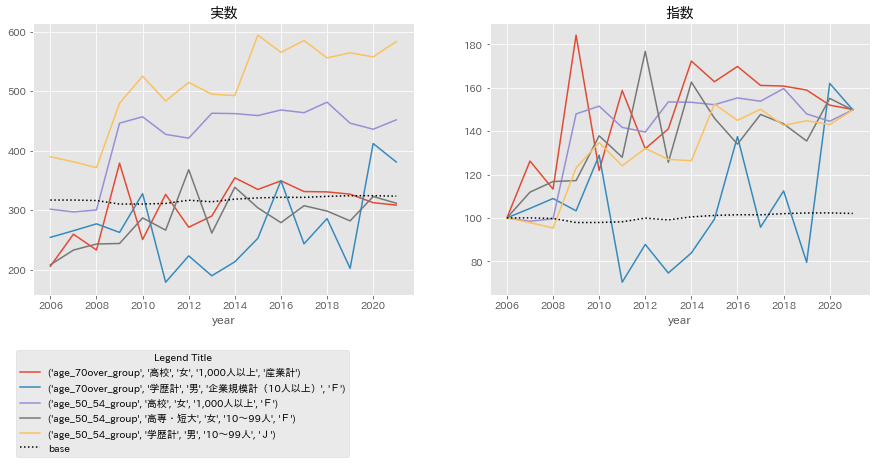

In [9]:
#@markdown ### plotする軸を選択 { display-mode: "form" }

CHANGE_TYPE = "変化率" #@param ["変化率", "変化幅"] {allow-input: true}
JOB_TYPE = "正社員・正職員計" #@param ["正社員・正職員計", "正社員・正職員以外計"] {allow-input: true}
PLOT_TYPE = "best_5" #@param ["best_5", "worst_5"] {allow-input: true}
plot_label = [
    str(_label).replace(f"'正社員・正職員計', ", "").replace(f"'正社員・正職員以外計', ", "")
    for _label in rate_dict_cols[JOB_TYPE][PLOT_TYPE]
]
plot_label.append("base")

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=False)
all_observed[rate_dict_cols[JOB_TYPE][PLOT_TYPE]].plot(ax=axes[0], legend=False)
all_observed[(JOB_TYPE, "年齢計", "学歴計", "男女計", "企業規模計（10人以上）", "産業計")].plot(
    ax=axes[0], legend=False, linestyle="dotted", color="black"
)

(
    100
    * (
        (1 + all_observed[rate_dict_cols[JOB_TYPE][PLOT_TYPE]].pct_change())
        .cumprod()
        .fillna(1)
    )
).plot(ax=axes[1], legend=False)

(
    100
    * (
        (
            1
            + all_observed[
                (JOB_TYPE, "年齢計", "学歴計", "男女計", "企業規模計（10人以上）", "産業計")
            ].pct_change()
        )
        .cumprod()
        .fillna(1)
    )
).plot(ax=axes[1], legend=False, linestyle="dotted", color="black")

axes[0].set_title("実数")
axes[1].set_title("指数")

fig.legend(
    labels=plot_label,
    bbox_to_anchor=(0.1, 0),
    loc="upper left",
    borderaxespad=1,
    title="Legend Title",
)

plt.show()

## サンプル分析：その２
- ボラティリティがまちまち
    - サンプル調査によるブレなのか
    - 実際のボラティリティリスクなのかはわからない
- いずれにしても、各年度の変化率の標準偏差を考慮した方がいい

In [10]:
return_df = all_observed.pct_change().dropna()
result_df = pd.concat(
    [
        pd.DataFrame(return_df.mean())
        , pd.DataFrame(return_df.std())
        , pd.DataFrame(return_df.mean()/ return_df.std())
    ],
    axis=1
)
result_df.columns=["retarn_mean", "return_std", "sharp_ratio"]

result_df = result_df.reset_index()
result_df.sort_values(by="sharp_ratio", ascending=False).head(20)


,job_type,age,education,gender,corporate_scale,industry_code,retarn_mean,return_std,sharp_ratio
13490,正社員・正職員計,年齢計,学歴計,女,10～99人,産業計,0.008537,0.007241,1.178890
7054,正社員・正職員計,age_20_24_group,学歴計,女,企業規模計（10人以上）,産業計,0.007770,0.007086,1.096428
3794,正社員・正職員以外計,age_50_54_group,高校,女,企業規模計（10人以上）,産業計,0.013333,0.012187,1.093992
6544,正社員・正職員以外計,年齢計,高校,男女計,100～999人,Ｐ,0.015467,0.014296,1.081904
3493,正社員・正職員以外計,age_50_54_group,学歴計,女,企業規模計（10人以上）,産業計,0.015163,0.014542,1.042696
7061,正社員・正職員計,age_20_24_group,学歴計,女,企業規模計（10人以上）,Ｊ,0.009278,0.008936,1.038294
6574,正社員・正職員以外計,年齢計,高校,男女計,企業規模計（10人以上）,Ｐ,0.012274,0.011944,1.027654
6441,正社員・正職員以外計,年齢計,高校,女,企業規模計（10人以上）,産業計,0.010698,0.010779,0.992495
13505,正社員・正職員計,年齢計,学歴計,女,企業規模計（10人以上）,産業計,0.008318,0.008513,0.977129
11538,正社員・正職員計,age_55_59_group,学歴計,女,10～99人,産業計,0.013891,0.014762,0.940987


In [11]:
import plotly.express as px
COLOR_TYPE = "corporate_scale" #@param ["age", "education", "gender", "corporate_scale", "industry_code"] {allow-input: true}

fig = px.scatter(
    result_df,
    x="return_std",
    y="retarn_mean",
    color=COLOR_TYPE,
    facet_col="job_type",
    opacity=0.5,
)
fig.show()

result_df.pivot_table(
    index=COLOR_TYPE, columns="job_type", values="sharp_ratio", aggfunc=np.mean
).style.bar(color="#d65f5f")


job_type,正社員・正職員以外計,正社員・正職員計
corporate_scale,,
"1,000人以上",0.112645,0.057916
100～999人,0.123413,0.059317
10～99人,0.099538,0.093351
企業規模計（10人以上）,0.126896,0.100379
